# Loop fitting H$_2$O and Silicate areas from unexposed MIs
- This notebook shows how to quantify the relative area of the silicate peak and H$_2$O peak, specifically from acquisitions of olivine-hosted melt inclusions. Specifically, the code unmixes the olivine and melt inclusions spectra to obtain the glass spectra
- In this example, we loop through multiple files, as we find we can use the same peak parameters for all of them

## Import necessary python things

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

'0.0.42'

In [2]:
import os
DayFolder=os.getcwd()
meta_path=DayFolder +  '\MetaData'
spectra_path=DayFolder + '\Spectra'
file_ext='.txt'
filetype='Witec_ASCII'

In [3]:
H2O_Files=pf.get_files(path=spectra_path,
file_ext=file_ext, ID_str='H2O', 
exclude_str=['depth', 'line', 'scan'], sort=False)
H2O_Files

['02 CC14_MI2_H2O_96mw.txt',
 '05 CC13_MI4_H2O.txt',
 '09 CC9_MI3_H2O.txt',
 '12 CC9_MI1_H2O_20X.txt',
 '15 CC9_MI1_H2O_50X.txt',
 '18 CC5_MI1_H2O_10mw.txt',
 '21 CC7_MI3_H2O.txt',
 '24 CC4_MI1_H2O.txt',
 '29 MS13_2_MI1_H2O.txt']

In [4]:
Ol_Files=pf.get_files(path=spectra_path,
file_ext=file_ext, ID_str='Ol',
exclude_str=['depth', 'line', 'scan'], sort=False)
Ol_Files

['03 CC14_MI2_Ol_96mw.txt',
 '06 CC13_MI4_Ol.txt',
 '10 CC9_MI3_Ol.txt',
 '16 CC9_MI1_Ol_50X.txt',
 '19 CC5_MI1_Ol.txt',
 '22 CC7_MI3_Ol.txt',
 '25 CC4_MI1_Ol.txt',
 '30 MS13_2_MI1_Ol.txt']

### Look at what is required to split up, and where xstal vs MI name are


In [5]:
print(Ol_Files[0].split('_'))

['03 CC14', 'MI2', 'Ol', '96mw.txt']


In [6]:
pos_crystal=0 
pos_MI=1
char_crystal='_'
char_MI='_'
Ol_Files_extract=pf.extract_xstal_MI_name(files=Ol_Files, prefix=True, str_prefix=' ',
char_xstal=char_crystal, pos_xstal=pos_crystal, char_MI=char_MI, pos_MI=pos_MI)
Ol_Files_extract.head()

,filename,crystal_name,MI_name
0,03 CC14_MI2_Ol_96mw.txt,CC14,MI2
1,06 CC13_MI4_Ol.txt,CC13,MI4
2,10 CC9_MI3_Ol.txt,CC9,MI3
3,16 CC9_MI1_Ol_50X.txt,CC9,MI1
4,19 CC5_MI1_Ol.txt,CC5,MI1


In [7]:
print(H2O_Files[0].split('_'))

['02 CC14', 'MI2', 'H2O', '96mw.txt']


In [8]:
H2O_Files_extract=pf.extract_xstal_MI_name(files=H2O_Files,prefix=True, str_prefix=' ',
char_xstal=char_crystal, pos_xstal=pos_crystal, char_MI=char_MI, pos_MI=pos_MI)
H2O_Files_extract.head()

,filename,crystal_name,MI_name
0,02 CC14_MI2_H2O_96mw.txt,CC14,MI2
1,05 CC13_MI4_H2O.txt,CC13,MI4
2,09 CC9_MI3_H2O.txt,CC9,MI3
3,12 CC9_MI1_H2O_20X.txt,CC9,MI1
4,15 CC9_MI1_H2O_50X.txt,CC9,MI1


In [9]:
merge=H2O_Files_extract.merge(Ol_Files_extract, on=['crystal_name', 'MI_name' ], how='inner')

In [10]:
merge

,filename_x,crystal_name,MI_name,filename_y
0,02 CC14_MI2_H2O_96mw.txt,CC14,MI2,03 CC14_MI2_Ol_96mw.txt
1,05 CC13_MI4_H2O.txt,CC13,MI4,06 CC13_MI4_Ol.txt
2,09 CC9_MI3_H2O.txt,CC9,MI3,10 CC9_MI3_Ol.txt
3,12 CC9_MI1_H2O_20X.txt,CC9,MI1,16 CC9_MI1_Ol_50X.txt
4,15 CC9_MI1_H2O_50X.txt,CC9,MI1,16 CC9_MI1_Ol_50X.txt
5,18 CC5_MI1_H2O_10mw.txt,CC5,MI1,19 CC5_MI1_Ol.txt
6,21 CC7_MI3_H2O.txt,CC7,MI3,22 CC7_MI3_Ol.txt
7,24 CC4_MI1_H2O.txt,CC4,MI1,25 CC4_MI1_Ol.txt
8,29 MS13_2_MI1_H2O.txt,MS13,2,30 MS13_2_MI1_Ol.txt


### Select file
- select a file to tweak fit parameters

In [11]:
i=1
filename_H2O=merge['filename_x'].iloc[i]
filename_Ol=merge['filename_y'].iloc[i]
print(merge['filename_y'].iloc[i])

06 CC13_MI4_Ol.txt


In [12]:
spectra_Ol=pf.get_data(path=spectra_path, filename=filename_Ol,
            Diad_files=None, filetype=filetype)

spectra_H2O=pf.get_data(path=spectra_path, filename=filename_H2O,
            Diad_files=None, filetype=filetype)

## First plot spectra

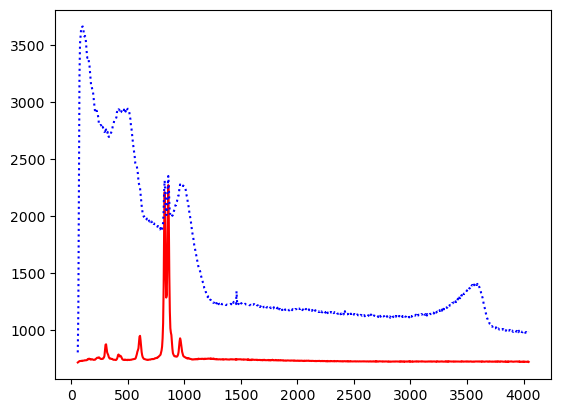

In [13]:
plt.plot(spectra_Ol[:, 0], spectra_Ol[:,1], '-r')
plt.plot(spectra_H2O[:, 0], spectra_H2O[:,1], ':b')

### Now, lets smooth and trim the spectra, and find the peaks

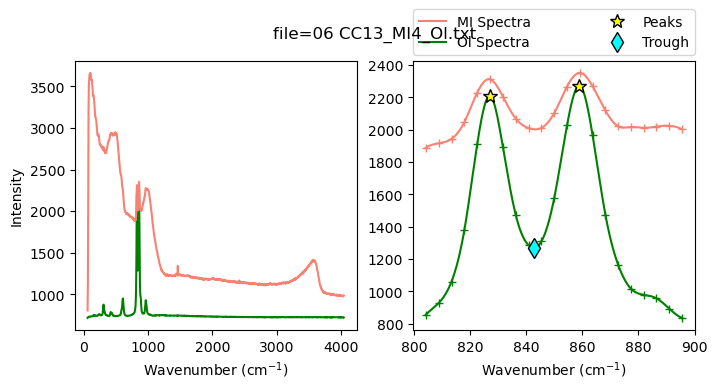

In [14]:
x_new, y_cub_MI, y_cub_Ol, peak_pos_Ol, peak_height_Ol, trough_x, trough_y, fig=pf.smooth_and_trim_around_olivine(
x_range=[800,900], x_max=900, Ol_spectra=spectra_Ol,
MI_spectra=spectra_H2O, filename=filename_Ol)
fig.savefig('smooth_Spline.png', dpi=300, bbox_inches='tight')

## Now lets look at different mixing proportions

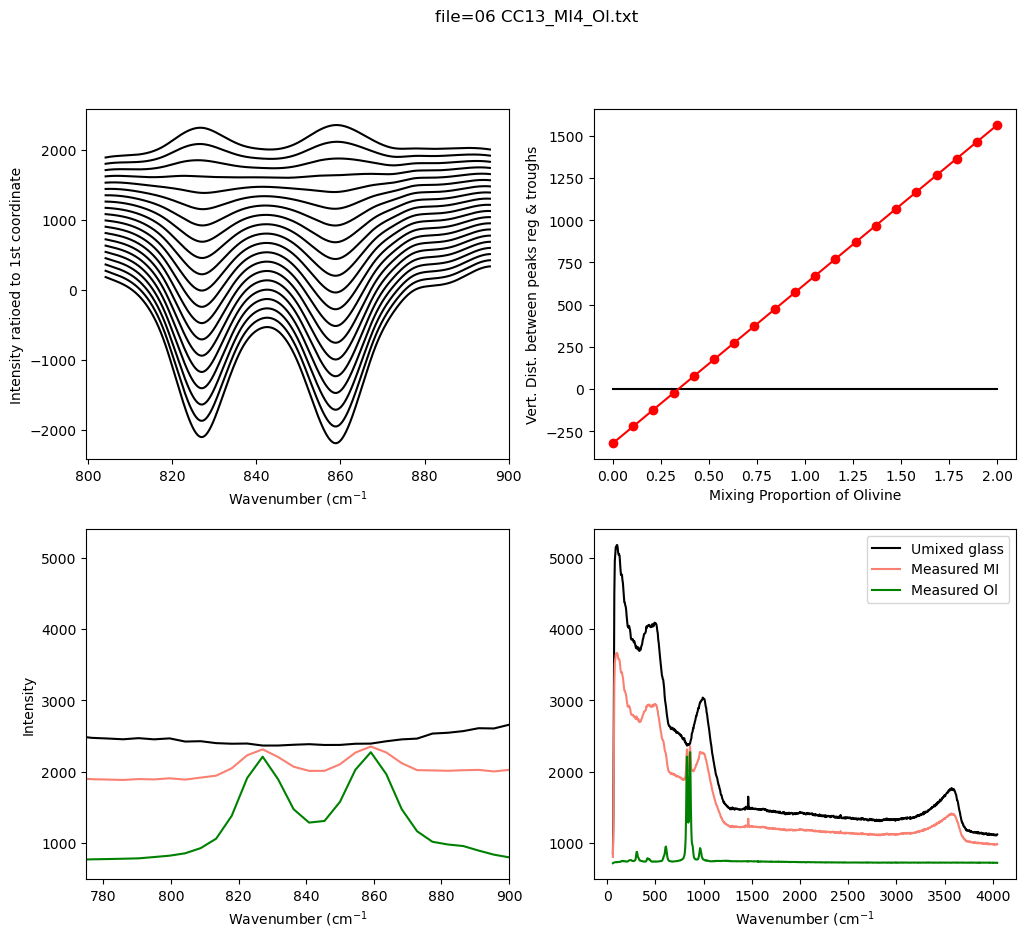

In [15]:
MI_Mix_Best, ideal_mix, Dist, MI_Mix, X=pf.make_evaluate_mixed_spectra(
path=spectra_path, filename=filename_Ol,
smoothed_Ol_y=y_cub_Ol, smoothed_MI_y=y_cub_MI,
Ol_spectra=spectra_Ol, MI_spectra=spectra_H2O, x_new=x_new, 
peak_pos_Ol= peak_pos_Ol,
trough_x=trough_x, trough_y=trough_y, N_steps=20, av_width=2,
X_min=0, X_max=2)

### check if spectra needs inverting
- Sometimes the best fit spectra will end up upsideown, this inverts it if this happens

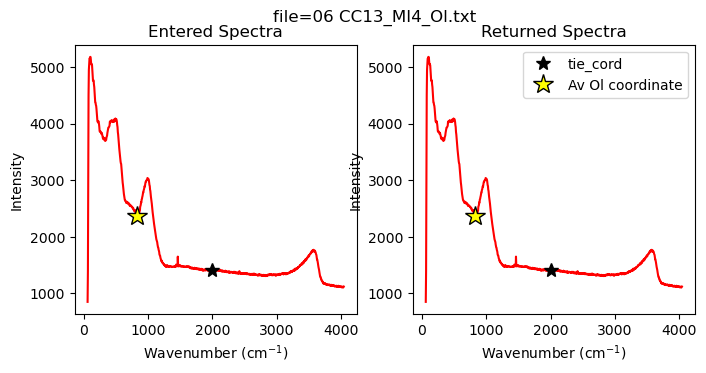

In [16]:
Spectra2=pf.check_if_spectra_negative(Spectra=MI_Mix_Best, 
path=spectra_path, filename=filename_Ol,
peak_pos_Ol=peak_pos_Ol, tie_x_cord=2000, override=False, flip=True)

## Now lets quantify the area under the silicate region

sil_bck_pos_Schiavi_basalt(lower_range_sil=(200, 320), mid_range1_sil=(640, 670), mid_range2_sil=(800, 860), upper_range_sil=(1200, 1300), LW=(400, 600), HW=(800, 1200), N_poly_sil=5, sigma_sil=5)


,Silicate_LHS_Back1,Silicate_LHS_Back2,Silicate_RHS_Back1,Silicate_RHS_Back2,Silicate_N_Poly,Silicate_Trapezoid_Area,Silicate_Simpson_Area,LW_Silicate_Trapezoid_Area,LW_Silicate_Simpson_Area,HW_Silicate_Trapezoid_Area,HW_Silicate_Simpson_Area,MW_Silicate_Trapezoid_Area,MW_Silicate_Simpson_Area
0,200,320,1200,1300,5,378823.385237,378959.477396,199638.575834,199402.620245,199638.575834,199402.620245,3243.413314,3171.252208


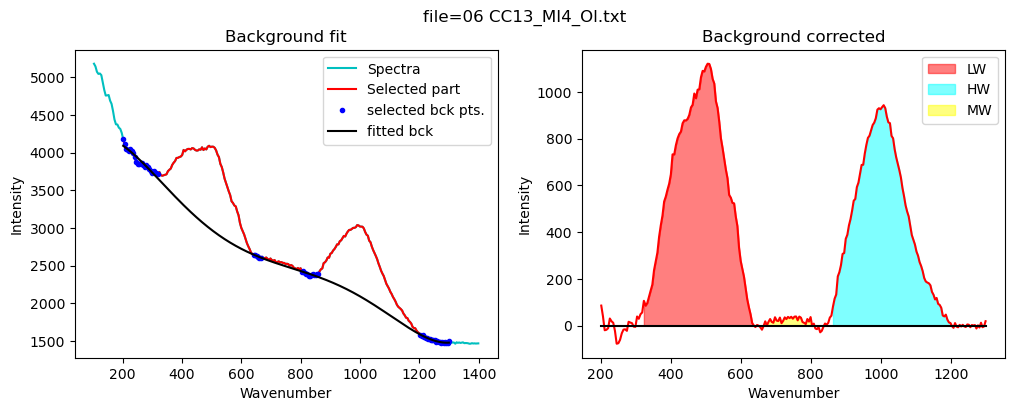

In [17]:
config_silicate=pf.sil_bck_pos_Schiavi_basalt(
lower_range_sil=(200, 320),
mid_range1_sil=(640, 670), mid_range2_sil=(800, 860),
upper_range_sil=(1200, 1300),
N_poly_sil=5)
print(config_silicate)
df_sil=pf.fit_area_for_silicate_region(Spectra=Spectra2, 
path=spectra_path, filename=filename_Ol, config1=config_silicate, 
 plot_figure=True,
fit_sil='poly')
df_sil

## Now quantify the area under the water region

water_bck_pos(fit_water='poly', N_poly_water=2, lower_bck_water=(2400, 2750), upper_bck_water=(3750, 4100))


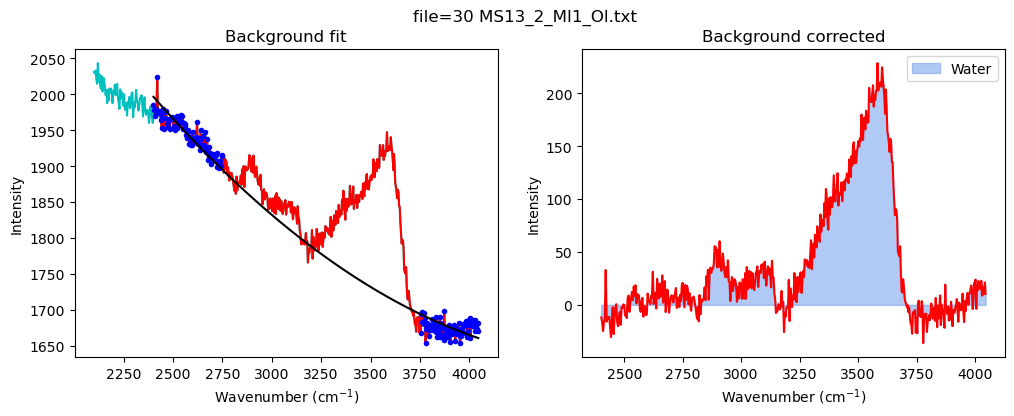

In [22]:
config_H2O=pf.water_bck_pos(lower_bck_water=(2400, 2750),
N_poly_water=2)
print(config_H2O)
df_H2O=pf.fit_area_for_water_region(
path=spectra_path, filename=filename_Ol,
Spectra=Spectra2, config1=config_H2O, plot_figure=True)

In [23]:
combo_out=pf.stitch_dataframes_together(df_sil=df_sil, df_water=df_H2O, 
Ol_file=filename_Ol, MI_file=filename_H2O)

In [24]:
combo_out

,Olivine filename,MI filename,HW:LW_Trapezoid,HW:LW_Simpson,Water_Trapezoid_Area,Water_Simpson_Area,Silicate_Trapezoid_Area,Silicate_Simpson_Area,Silicate_LHS_Back1,Silicate_LHS_Back2,...,LW_Silicate_Simpson_Area,HW_Silicate_Trapezoid_Area,HW_Silicate_Simpson_Area,MW_Silicate_Trapezoid_Area,MW_Silicate_Simpson_Area,Water_LHS_Back1,Water_LHS_Back2,Water_RHS_Back1,Water_RHS_Back2,Water_N_Poly
0,30 MS13_2_MI1_Ol.txt,29 MS13_2_MI1_H2O.txt,0.185534,0.185022,68860.640367,68760.368634,706096.111383,704640.972216,200,320,...,371632.597204,371147.993583,371632.597204,-5015.711367,-5142.618122,2400,2750,3750,4100,2


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:06<00:00,  1.32it/s]


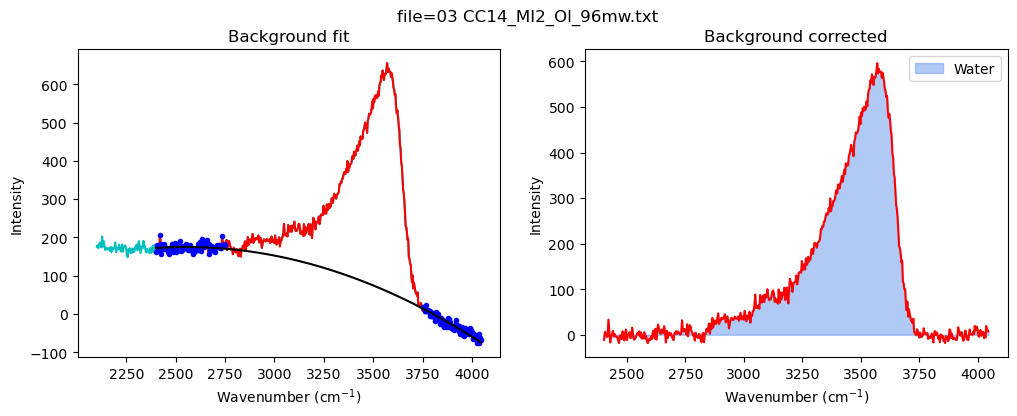

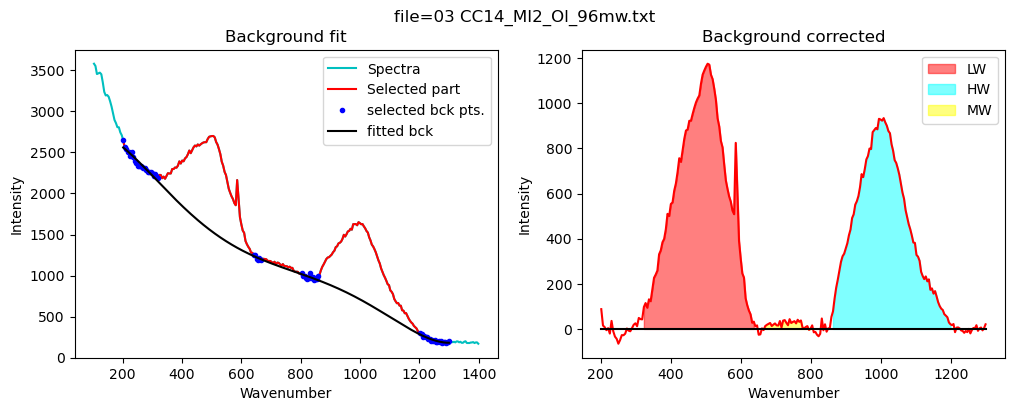

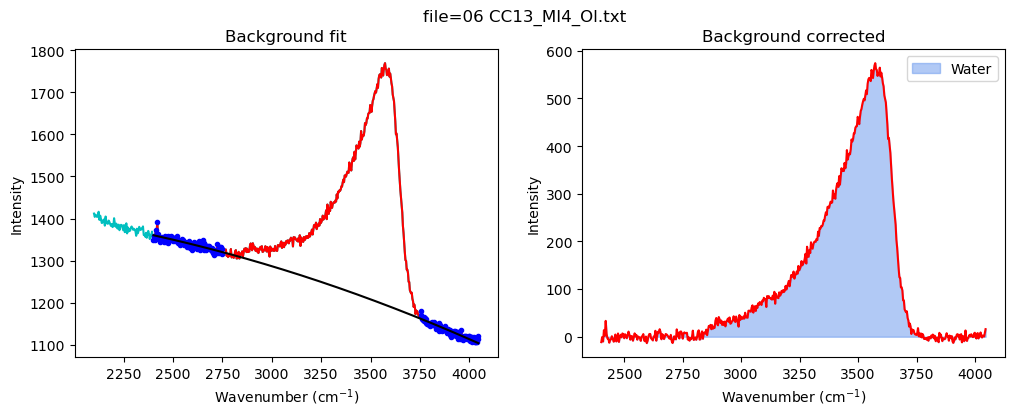

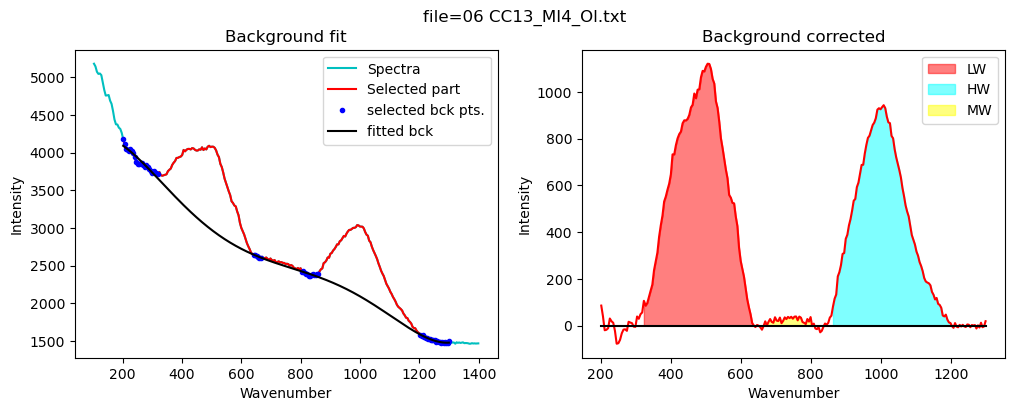

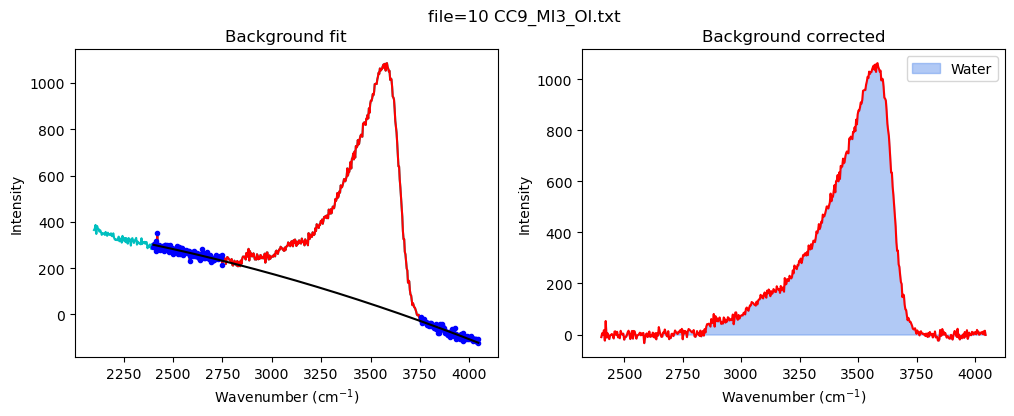

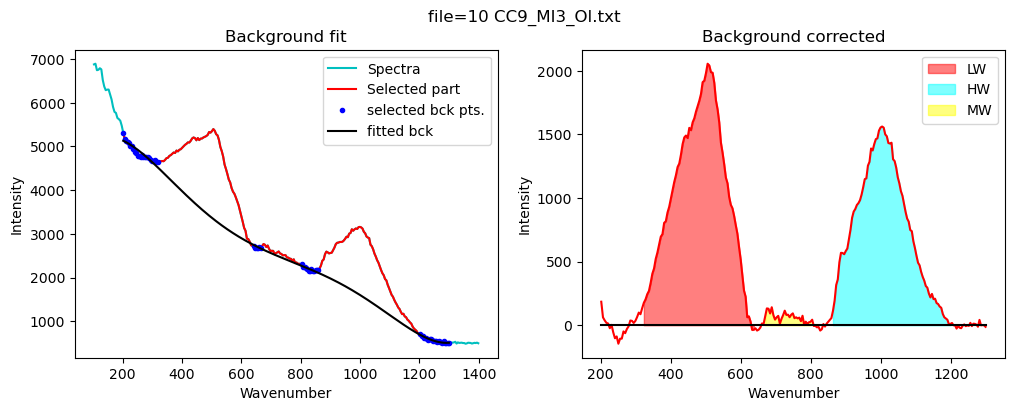

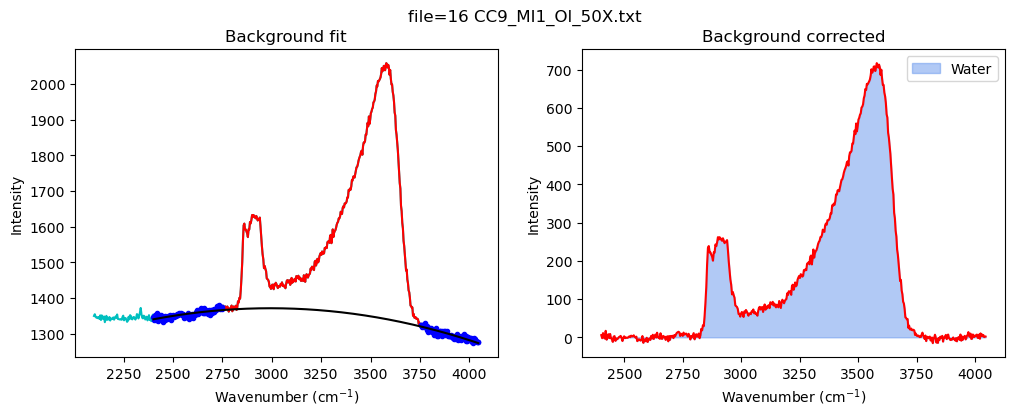

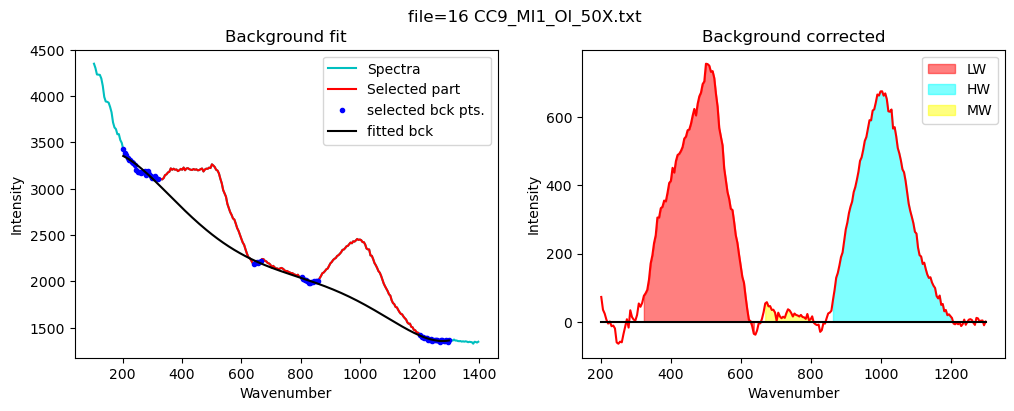

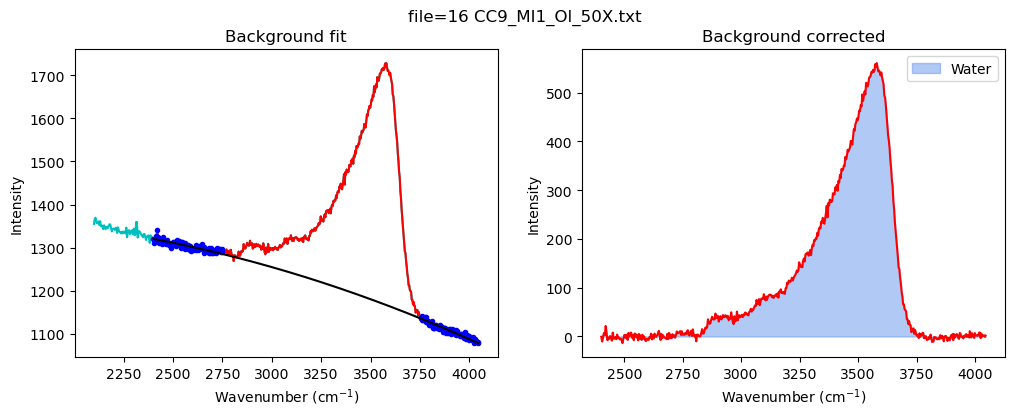

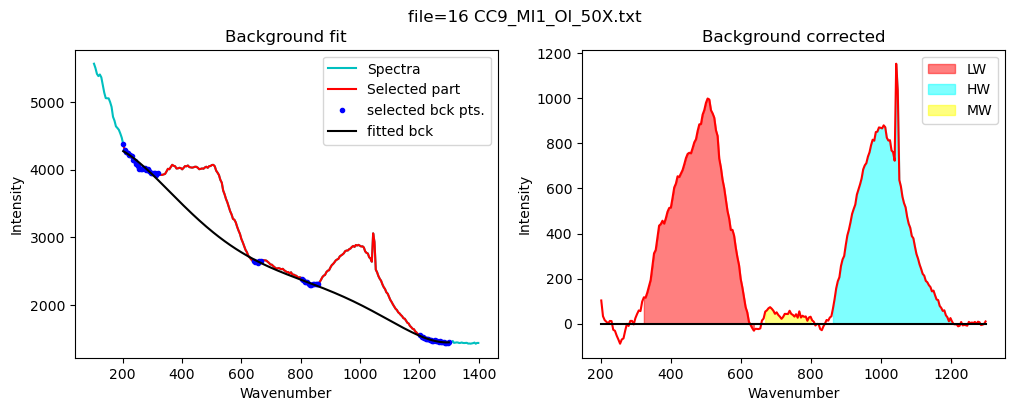

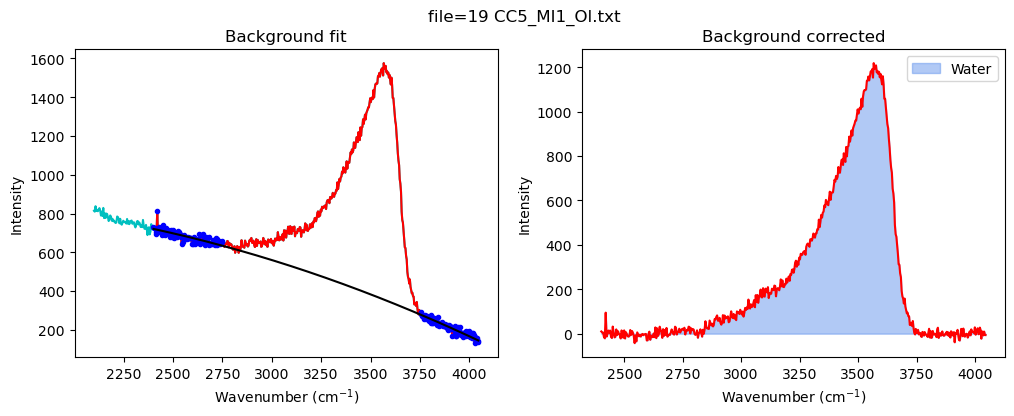

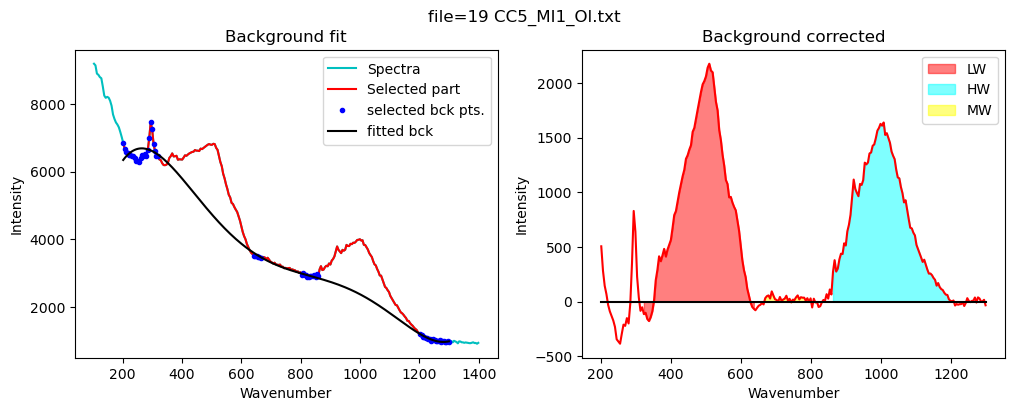

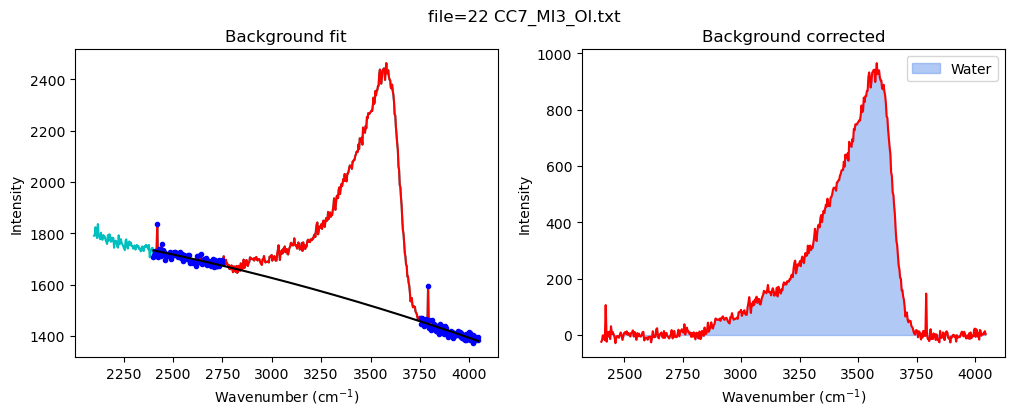

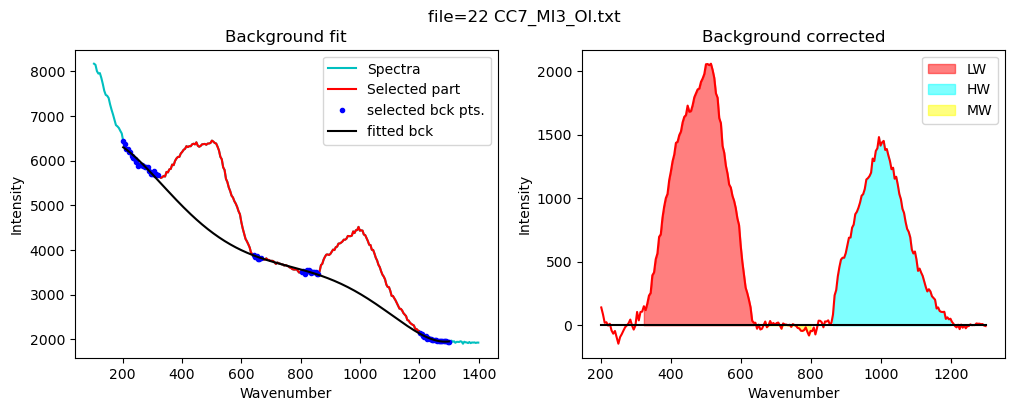

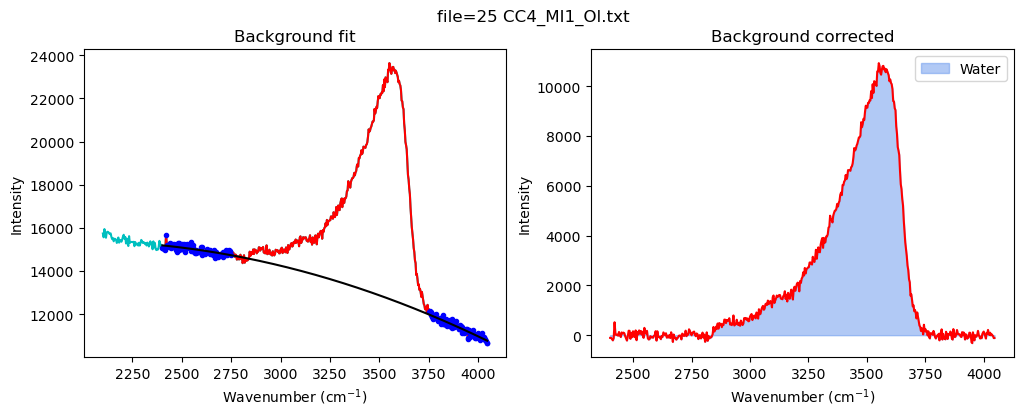

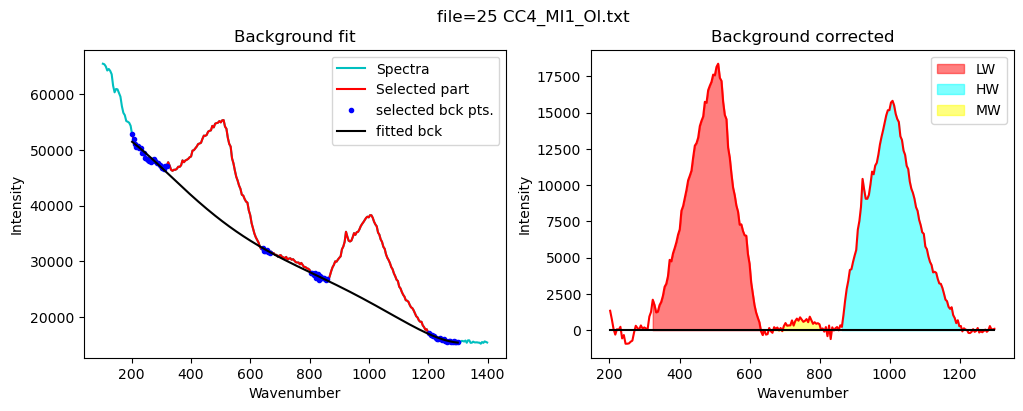

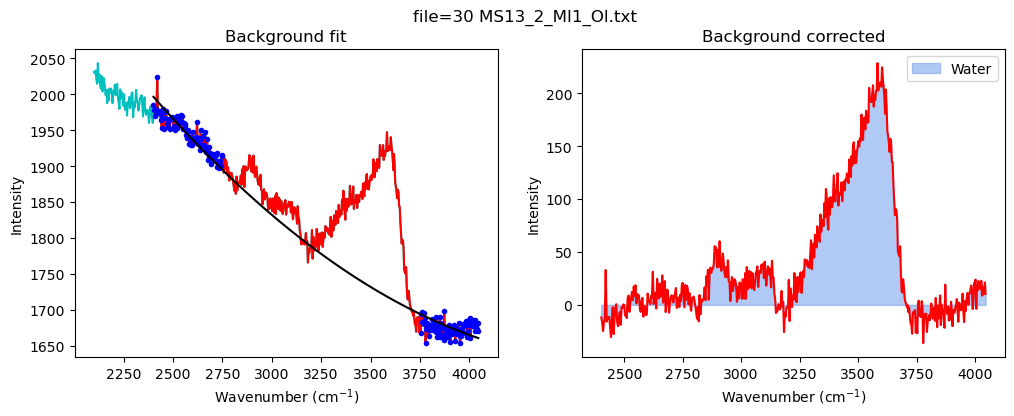

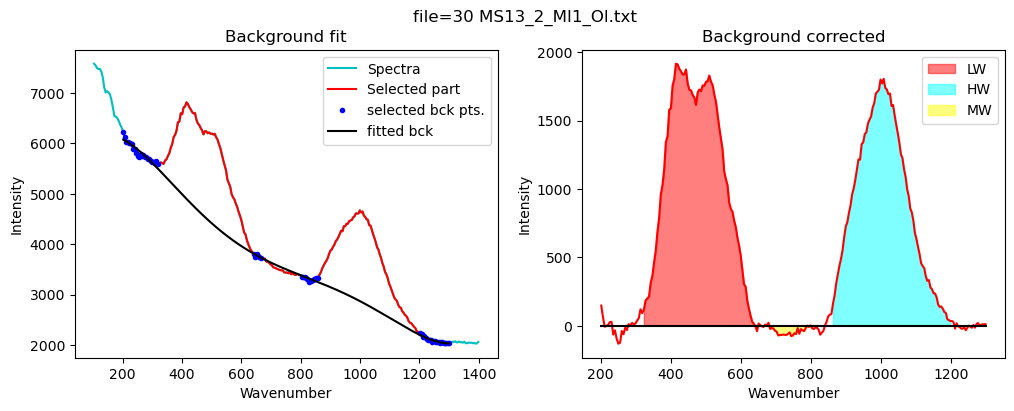

In [28]:
## Now lets loop through all files
from tqdm import tqdm

df_merged=pd.DataFrame([])
for i in tqdm(range(0, len(merge))):
    filename_H2O=merge['filename_x'].iloc[i]
    filename_Ol=merge['filename_y'].iloc[i]

    
    # Get files
    spectra_Ol=pf.get_data(path=spectra_path, filename=filename_Ol,
            Diad_files=None, filetype=filetype)

    spectra_H2O=pf.get_data(path=spectra_path, filename=filename_H2O,
            Diad_files=None, filetype=filetype)
    
    # Smooth spectra
    x_new, y_cub_MI, y_cub_Ol, peak_pos_Ol, peak_height_Ol, trough_x, trough_y=pf.smooth_and_trim_around_olivine(
    x_range=[800,900], x_max=900, Ol_spectra=spectra_Ol,
    MI_spectra=spectra_H2O, filename=filename_Ol, plot_figure=False)

    # Get best fit mixing proportions
    MI_Mix_Best, ideal_mix, Dist, MI_Mix, X=pf.make_evaluate_mixed_spectra(
    path=spectra_path, filename=filename_Ol,
    smoothed_Ol_y=y_cub_Ol, smoothed_MI_y=y_cub_MI,
    Ol_spectra=spectra_Ol, MI_spectra=spectra_H2O, x_new=x_new, 
    peak_pos_Ol= peak_pos_Ol,
    trough_x=trough_x, trough_y=trough_y, N_steps=20, av_width=2,
    X_min=0, X_max=2, plot_figure=False)


    Spectra2=pf.check_if_spectra_negative(Spectra=MI_Mix_Best, 
    path=spectra_path, filename=filename_Ol,
    peak_pos_Ol=peak_pos_Ol, tie_x_cord=2000, 
    override=False, flip=True, plot_figure=False)    

    # Fit water
    df_H2O=pf.fit_area_for_water_region(
    path=spectra_path, filename=filename_Ol,
    Spectra=Spectra2, config1=config_H2O, plot_figure=True)
    
    # Fit silica spectra
    df_sil=pf.fit_area_for_silicate_region(Spectra=Spectra2, 
    path=spectra_path, filename=filename_Ol, config1=config_silicate, 
     plot_figure=True,
    fit_sil='poly')
    
    data=pf.stitch_dataframes_together(df_sil=df_sil, 
        df_water=df_H2O, 
Ol_file=filename_Ol, MI_file=filename_H2O)
    
    df_merged = pd.concat([df_merged, data], axis=0)
                          
df_merged=df_merged.reset_index(drop=True)

In [29]:
df_merged.head()

,Olivine filename,MI filename,HW:LW_Trapezoid,HW:LW_Simpson,Water_Trapezoid_Area,Water_Simpson_Area,Silicate_Trapezoid_Area,Silicate_Simpson_Area,Silicate_LHS_Back1,Silicate_LHS_Back2,...,LW_Silicate_Simpson_Area,HW_Silicate_Trapezoid_Area,HW_Silicate_Simpson_Area,MW_Silicate_Trapezoid_Area,MW_Silicate_Simpson_Area,Water_LHS_Back1,Water_LHS_Back2,Water_RHS_Back1,Water_RHS_Back2,Water_N_Poly
0,03 CC14_MI2_Ol_96mw.txt,02 CC14_MI2_H2O_96mw.txt,1.065692,1.062774,211330.717146,211165.808780,379864.496263,379745.013178,200,320,...,198693.030414,198303.832398,198693.030414,2856.492903,2889.766264,2400,2750,3750,4100,2
1,06 CC13_MI4_Ol.txt,05 CC13_MI4_H2O.txt,1.026383,1.027836,204905.623402,204953.099115,378823.385237,378959.477396,200,320,...,199402.620245,199638.575834,199402.620245,3243.413314,3171.252208,2400,2750,3750,4100,2
2,10 CC9_MI3_Ol.txt,09 CC9_MI3_H2O.txt,1.144681,1.144598,390345.883604,390493.015370,641775.587932,641133.969309,200,320,...,341161.574692,341008.389152,341161.574692,8678.840041,8710.813827,2400,2750,3750,4100,2
3,16 CC9_MI1_Ol_50X.txt,12 CC9_MI1_H2O_20X.txt,2.093382,2.093517,271652.008729,271618.716229,262087.178060,262072.519289,200,320,...,129742.805488,129767.062455,129742.805488,3076.166398,3017.302181,2400,2750,3750,4100,2
4,16 CC9_MI1_Ol_50X.txt,15 CC9_MI1_H2O_50X.txt,1.199235,1.200204,203547.742283,203697.502551,347528.113007,347401.545257,200,320,...,169719.042481,169731.371435,169719.042481,5423.488225,5568.872826,2400,2750,3750,4100,2


In [30]:
df_merged.to_excel('H2O_Silicate_areas.xlsx')